# Nearest neighbor

## 모듈 임포트

In [165]:
from __future__ import print_function
import os
data_path = ['./']

from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [166]:
import pandas as pd

# Import the data using the file path
filepath = os.sep.join(data_path + ['water_potability.csv'])
data = pd.read_csv(filepath)


## 결측치 처리

In [167]:
# 0 넣기

data = data.fillna(0)
mf_tool = "0 채우기"


In [168]:
# 평균치 넣기

# for col in data.columns:
#     data[col] = data[col].fillna(data[col].mean())

# mf_tool = "평균값 채우기"
# display(data)


## 데이터 스플릿

In [169]:
# water 데이터셋에서 레이블은 Potability
x_cols = [x for x in data.columns if x != 'Potability']

X_data = data[x_cols]
y_data = data['Potability']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    test_size =0.2, random_state=43)


## 스케일링

In [170]:
# scaler = StandardScaler()
scaler = MinMaxScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns= X_train.columns)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns= X_test.columns)


display(X_train)
display(X_test)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
696,9.545271,212.046391,25189.830622,6.203869,316.567319,498.266959,20.051519,52.901127,4.983903
1993,7.657542,230.820008,35056.232234,7.656807,364.130141,305.629409,18.481396,72.205075,4.792527
352,9.495456,185.878594,18088.354850,7.527375,388.768657,409.450998,12.397704,63.359144,4.168541
3115,4.709187,179.141018,22291.418577,6.774276,407.417977,371.264843,18.186801,86.528627,3.860084
2995,5.584124,203.756426,29999.987005,7.213329,310.660284,366.558131,14.183025,65.881271,3.852732
...,...,...,...,...,...,...,...,...,...
2064,9.680475,199.531666,32916.331478,6.127804,0.000000,461.300095,16.109678,76.543839,2.795840
2106,9.135452,233.175332,32105.287115,6.749696,0.000000,370.929809,16.334776,68.697042,3.643687
2325,5.685216,154.570002,17628.043059,6.664444,390.094731,324.427772,17.352586,67.407300,4.066157
2303,8.111101,198.768195,35200.798834,9.685390,0.000000,348.971395,19.071935,72.871564,3.663775


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2592,0.000000,223.890412,8722.153022,8.569451,0.000000,375.142277,15.430847,64.564143,3.440300
1565,6.191241,231.322797,29778.357877,4.381097,248.304391,488.954164,13.022135,54.060851,3.315071
1376,5.669819,203.452715,27244.634470,6.604950,0.000000,361.238480,11.095060,68.923128,5.600459
2077,6.043212,151.148322,24207.081673,8.414072,0.000000,410.909289,10.085050,107.585967,4.196726
1607,0.000000,190.877470,39802.514917,5.216683,288.231518,365.148152,13.680838,91.925742,4.989876
...,...,...,...,...,...,...,...,...,...
2992,0.000000,196.083556,18592.083920,7.245436,321.814033,552.879034,15.664786,81.080826,4.762872
2264,6.396341,126.490745,20115.733588,7.763739,427.377802,435.278434,11.881668,53.659152,4.445907
1154,0.000000,181.301874,23614.702961,5.454994,282.311641,510.944626,13.978608,52.301550,3.894061
1977,7.176171,206.294901,25794.950190,7.794727,321.284079,485.254430,15.574877,49.151960,4.742967


In [171]:
# 정확도 측정 function

def accuracy(real, predict):
    return sum(real == predict) / float(real.shape[0])

In [172]:
score_list = list()

k_range = 200

k_max = 0
score_max = 0

for k in range(1, k_range):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_train_scaled, y_train)
    
    y_pred = knn.predict(X_test_scaled)
    score = accuracy(y_test, y_pred)

    if(score_max < score):
        k_max = k
        score_max = score
    
    score_list.append((k, score))
    
score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])

In [173]:
# Import libraries to make the plot

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

결측치 보정 : 0 채우기
MinMaxScaler()
최적 K : 11
정확도 : 0.6646341463414634


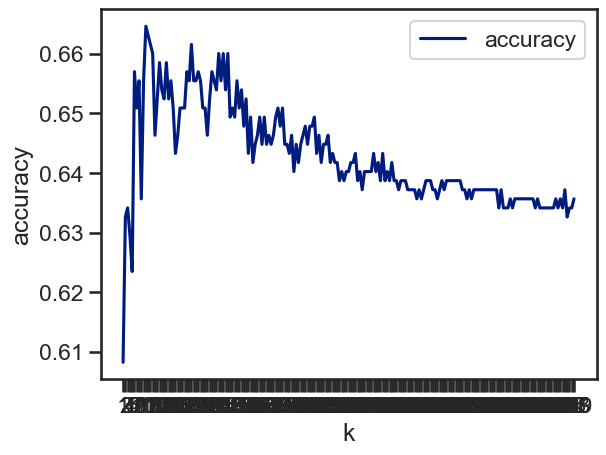

In [174]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = score_df.set_index('k').plot()

ax.set(xlabel='k', ylabel='accuracy')
ax.set_xticks(range(1, k_range));

print("결측치 보정 : " + mf_tool)
print(scaler)
print("최적 K :", k_max)
print("정확도 :", score_max)
